In [1]:
import PIL
from PIL import Image
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.keypoint_rcnn import KeypointRCNNPredictor
import vis

## Load Model

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)

model.roi_heads.box_predictor = FastRCNNPredictor(1024, 2)

model.roi_heads.keypoint_predictor = KeypointRCNNPredictor(512, 8)

model.load_state_dict(torch.load('model', map_location=device))

model.eval();

## Inference on Single Image

In [5]:
image = PIL.Image.open('data\\keypoints_data\\images\\0001.png')

image_tensor = torchvision.transforms.functional.to_tensor(image)

output = model([image_tensor])

print(output)

[{'boxes': tensor([[459.8247, 114.6413, 745.4227, 362.1035],
        [587.4269, 107.6059, 754.3221, 317.2154],
        [456.7994, 142.4198, 618.8647, 361.9091]], grad_fn=<StackBackward>), 'labels': tensor([1, 1, 1]), 'scores': tensor([1.0000, 0.0636, 0.0565], grad_fn=<IndexBackward>), 'keypoints': tensor([[[648.0792, 312.6970,   1.0000],
         [581.1824, 142.5668,   1.0000],
         [648.0792, 312.6970,   1.0000],
         [581.1824, 142.5668,   1.0000],
         [648.9368, 312.6970,   1.0000],
         [581.1824, 142.5668,   1.0000],
         [648.9368, 312.6970,   1.0000],
         [648.0792, 312.6970,   1.0000]],

        [[688.8479, 116.6260,   1.0000],
         [688.8479, 116.6260,   1.0000],
         [688.8479, 116.6260,   1.0000],
         [688.8479, 116.6260,   1.0000],
         [688.8479, 116.6260,   1.0000],
         [688.8479, 116.6260,   1.0000],
         [688.8479, 116.6260,   1.0000],
         [688.8479, 116.6260,   1.0000]],

        [[580.7065, 142.8485,   1.0000],


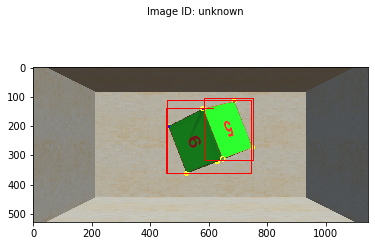

In [6]:
vis.vis_one(image_tensor, output[0])